In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nn consists of all of PyTorch's building blocks for neural networks

In [ ]:
from torch import nn

### 1. Preparing data and loading

diff types of data :
 -spreadsheet
 -Image
 -Vid
 -Audio
 -DNA
 -Text

 Creating data using linear regression

In [ ]:
# Create *known* parameters
weight = 0.7 
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets

In [ ]:
# Create a train test split
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

Using matplotlib to visualize data

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10,7))
  #plotting training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training dataset")
  #test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing dataset")

  #for the predictions
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  #show the legend
  plt.legend(prop={"size":14});

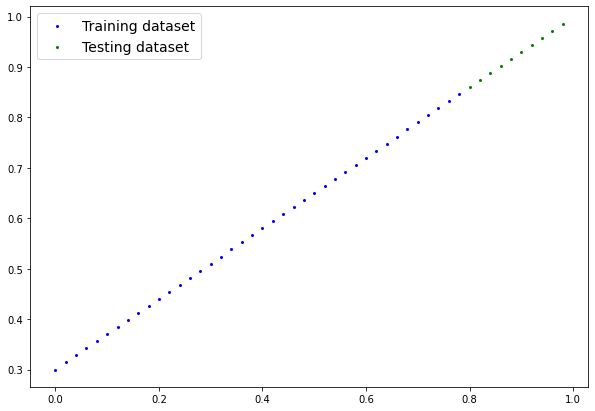

In [ ]:
plot_predictions()

In [ ]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): #majority of things are inherited in nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,#uses gradient descent algorithm
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    #forward method to define the computation in the model
  def forward(self, x:torch.Tensor)-> torch.Tensor:
    return self.weights * x + self.bias

### Pytorch model building essentials

* torch.nn
* torch.nn.Parameter
* torch.nn.Module - requires forward method to be written
* torch.optim - for optimizers in Python , help with gradient descent


In [ ]:
# Create a random seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named params
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### making predictions using torch.inference_mode()
to check model's predictive power

In [ ]:
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

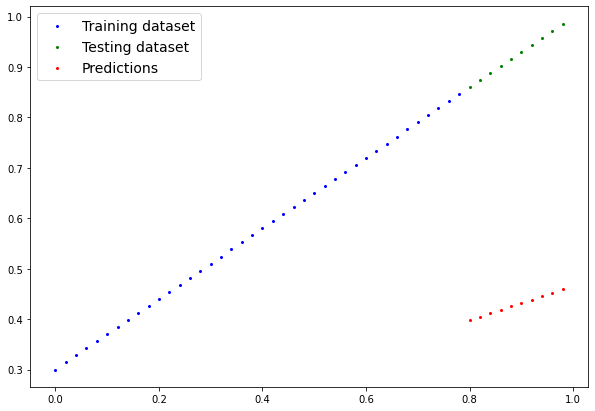

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#Loss Function - to measure how wrong our models prediction is to the ideal output
#Optimizer: takes into account the loss of a model and adjusts the model's params
#nn.L1Loss- helps calculate mean absolute error

In [ ]:
# Setup a loss a function
loss_fn = nn.L1Loss()


# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

### Building a training loop
0. Loop through the data
1. Forward pass (involves data moving through our model's forward() function's)
2.Calculate the loss (compare forward pass predictions to ground truth labels)
3.Optimizer Zero grad
4.Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model WRT the loss(back propagation)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(Gradient Descent)
 

In [ ]:
torch.manual_seed(42)

# epoch is one loop through the data
epochs=200
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epochs in range(epochs):
  # set the model to training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred,y_train)

  #Optimizer 0 grad
  optimizer.zero_grad()

  #4. perform back propogation
  loss.backward()

  #5. step the optimizer
  optimizer.step()

  model_0.eval() # turns off settings in model not needed for evaluation
  with torch.inference_mode():#turns off gradient tracking
    #1 - forward pass
    test_pred = model_0(X_test)

    #2- loss function
    test_loss = loss_fn(test_pred, y_test)
    #as we can see in testing we compare to the actual values to check how close to 0 the test loss is
    #we dont implement bactracking here as that's only meant for training data
  if epochs%10 ==0:
    print(f"Epoch: {epochs} | loss:{loss} | Test loss: {test_loss}")
    print(model_0.state_dict())
    epoch_count.append(epochs)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

  
  


Epoch: 0 | loss:0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | loss:0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | loss:0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | loss:0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | loss:0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | loss:0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | loss:0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

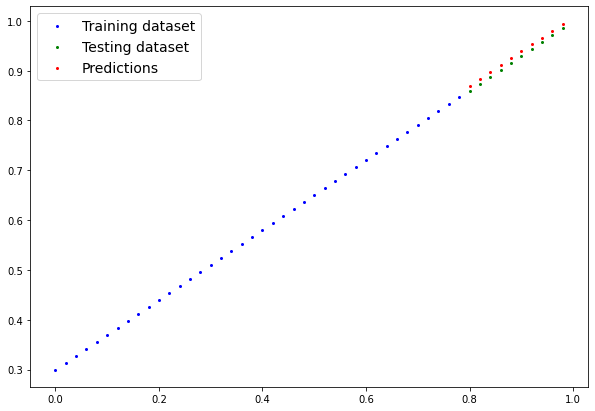

In [ ]:
plot_predictions(predictions=y_preds_new)

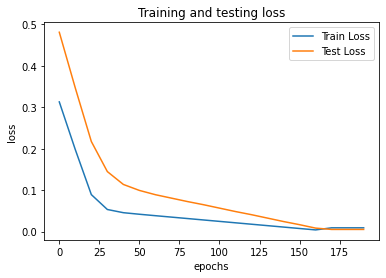

In [ ]:
# plotting the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and testing loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()


### Saving model in pytorch
There are 3 main methods
1. 'torch.save()'-save pytorch object in python's pickle format
2. 'torch.load()'-loads saved pytorch object
3. 'torch.nn.Module.load_state_dict()'- loads a models saved dictionary
